# Introduction to Data Science 
# Lecture 17: Clustering 1
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we will introduce clustering, an **unsupervised** learning technique. We'll cover the following topics:
* supervised vs. unsupervised learning
* clustering 
* the k-means clustering algorithm

Recommended Reading: 
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.1 and 10.3. [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)
* J. Grus, Data Science from Scratch, Ch. 19
* [scikit-learn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html)

### Types of Clustering Methods

1. Partitional Algorithms
 - divide data into set of bins
 - bins either manually set (e.g., k-means) or automatically determined (e.g., affinity propagation)

2. Hierarchical Algorithms
 - Produce a *dendrogram* or "similarity tree", 
 - clusters can be produced by "cutting" the dendrogram

3. Bi-Clustering
 - Clusters dimensions & records

4. Fuzzy clustering
 - probabilistic cluster assignment allows occurrence of elements in multiples clusters
 
Many variants of these ideas are implemented in scikit-learn. [Here](http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods) is an overview. 


There are several **methods** for clustering. We'll discuss: 
* k-means clustering (today)
* hierarchical clustering 
* DBSCAN

## K-Means with SciKit Learn

SciKit learn has a nice [implementaton of the k-means method](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), which we'll use to cluster various artificial datasets first.

In [3]:
import numpy as np

from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')
# Create color maps
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"])

**How do you choose K?** Ideas:

1. Visual comparison.
2. Looking for at which $k$ the total intra-cluster distance tapers off. 
3. [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

The first method is useful when the feature vectors are lower dimensional, but it's difficult to visualize data in higher dimensions. Let's consider the other two ideas.

### Analyzing Change in Intra-Cluster Distance

We can run K-Means for different Ks and plot the intra-cluster distance. 

In [4]:
import pandas as pd

In [133]:
df = pd.read_csv('../../../comp5360_final/data_acquisition/Python/final_combined_QSO_1.csv')
df.head(1)

Unnamed: 0  Unnamed: 0.1  plate         z  redshift   class  \
0           0             0   5812  18.79371  0.634794  GALAXY   

           spec_obj_ID               obj_ID       alpha      delta         u  \
0  6543777369295181824  1237660961327743273  135.689107  32.494632  23.87882   

         g         r         i  run_ID  rerun_ID  cam_col  field_ID    MJD  \
0  22.2753  20.39501  19.16573    3606       301        2        79  56354   

   fiber_ID  
0       171

In [134]:
df = df.drop(df.columns[0:2], axis=1)
df.head(1)

plate         z  redshift   class          spec_obj_ID  \
0   5812  18.79371  0.634794  GALAXY  6543777369295181824   

                obj_ID       alpha      delta         u        g         r  \
0  1237660961327743273  135.689107  32.494632  23.87882  22.2753  20.39501   

          i  run_ID  rerun_ID  cam_col  field_ID    MJD  fiber_ID  
0  19.16573    3606       301        2        79  56354       171

## Are there any NaN's

In [135]:
df.isna().sum()

plate          0
z              0
redshift       0
class          0
spec_obj_ID    0
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
MJD            0
fiber_ID       0
dtype: int64

# Check data types

In [136]:
df.dtypes

plate            int64
z              float64
redshift       float64
class           object
spec_obj_ID     uint64
obj_ID           int64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
MJD              int64
fiber_ID         int64
dtype: object

------------

## Encode `class`

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
le = LabelEncoder().fit(df['class'])
df['class_num'] = le.transform(df['class'])
df.tail().loc[:,['class','class_num']]

class  class_num
71150  GALAXY          0
71151     QSO          1
71152  GALAXY          0
71153  GALAXY          0
71154  GALAXY          0

----------

# Look at other variables

In [139]:
df.dtypes

plate            int64
z              float64
redshift       float64
class           object
spec_obj_ID     uint64
obj_ID           int64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
MJD              int64
fiber_ID         int64
class_num        int32
dtype: object

----------

# Modified Julian Date (MJD)

In [140]:
df.MJD.min()

51608

In [141]:
march_2000 = 51603  #https://core2.gsfc.nasa.gov/time/mjd2000.html

In [142]:
(df.MJD.max() - df.MJD.min()) / 365.25

20.05201916495551

## Roughly March 2000 through Mid-2020

## Drop for now to simplifiy exploratory clustering

In [143]:
df = df.drop(['class', 'spec_obj_ID', 'obj_ID', 'MJD'], axis=1)
df.dtypes

plate          int64
z            float64
redshift     float64
alpha        float64
delta        float64
u            float64
g            float64
r            float64
i            float64
run_ID         int64
rerun_ID       int64
cam_col        int64
field_ID       int64
fiber_ID       int64
class_num      int32
dtype: object

## k-means

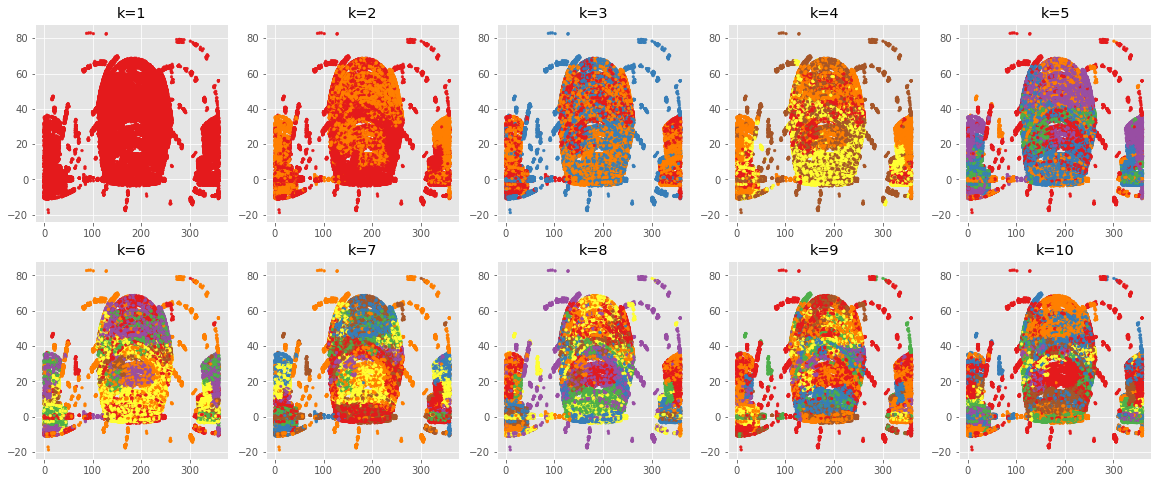

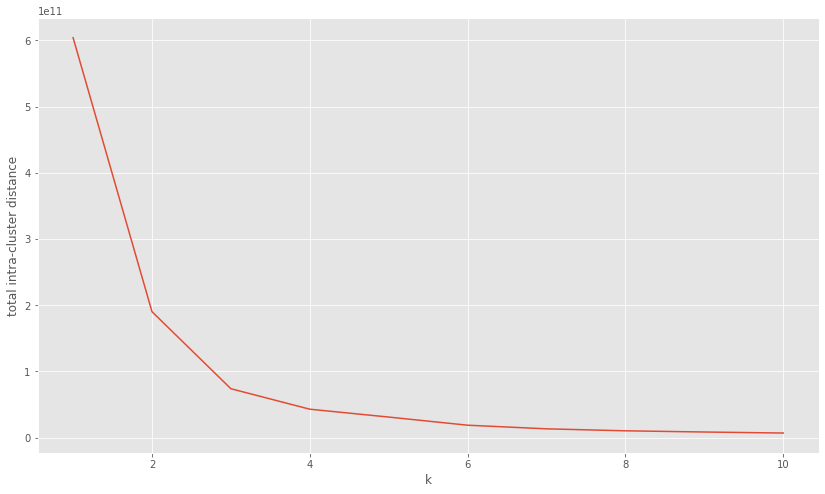

In [184]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Base-Truth is k=3, elbow appears to be 3 or 4

# Rerun with less columns

In [145]:
df.columns

Index(['plate', 'z', 'redshift', 'alpha', 'delta', 'u', 'g', 'r', 'i',
       'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'class_num'],
      dtype='object')

## k-means

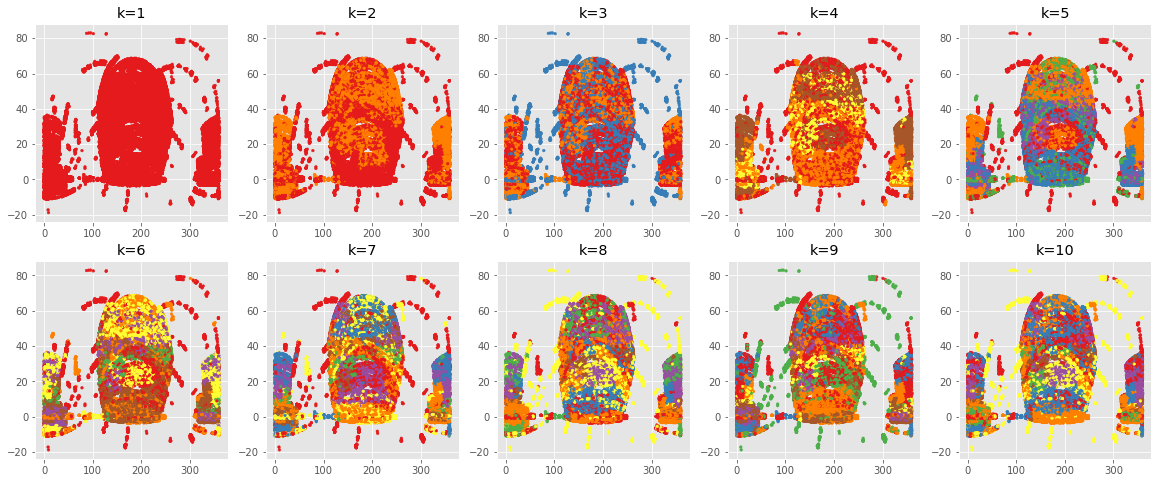

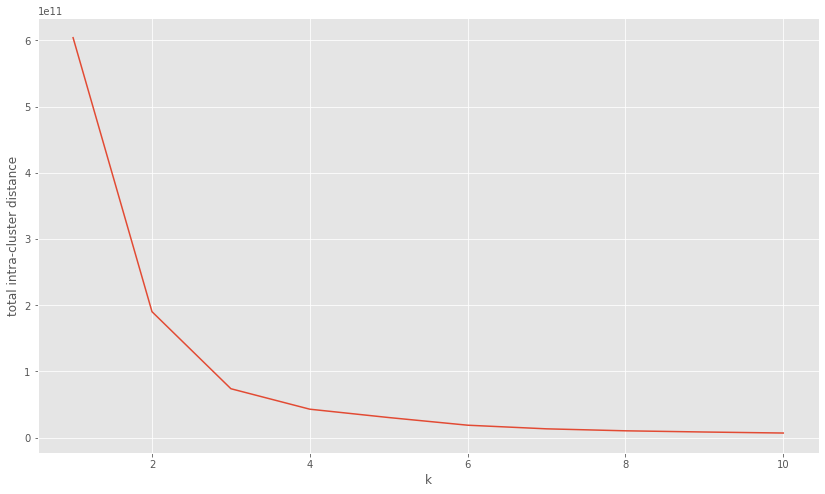

In [146]:
# clustering for k = 1 to k = 10
ks = range(1,11)
scores = []

fig, axs = plt.subplots(2,5, figsize=(20, 8))
# fig, axs = plt.subplots(1,1)

for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1).values)
    scores.append(-model.score(df.drop(['run_ID', 'rerun_ID', 
                                        'cam_col', 'field_ID', 
                                        'fiber_ID', 'class_num'],axis=1)))

    subplot = axs[int((k-1)/5)][(k-1)%5]
    subplot.scatter(x='alpha', y='delta', c=y_pred, data=df,  marker="o", cmap=cmap, s=7);
    subplot.set_title("k="+str(k))

    
fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

# Elbow is more distinctly k=3 (Base-Truth) 
### Removed variables resulted in ~ order of magnitude less intra-cluster distance at k=3 than before

In [147]:
df = df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID'],axis=1)
df.head(1)

plate         z  redshift       alpha      delta         u        g  \
0   5812  18.79371  0.634794  135.689107  32.494632  23.87882  22.2753   

          r         i  class_num  
0  20.39501  19.16573          0

----------

# Silhouette plot

For n_clusters = 2 The silhouette_score is : 0.5738599509906098


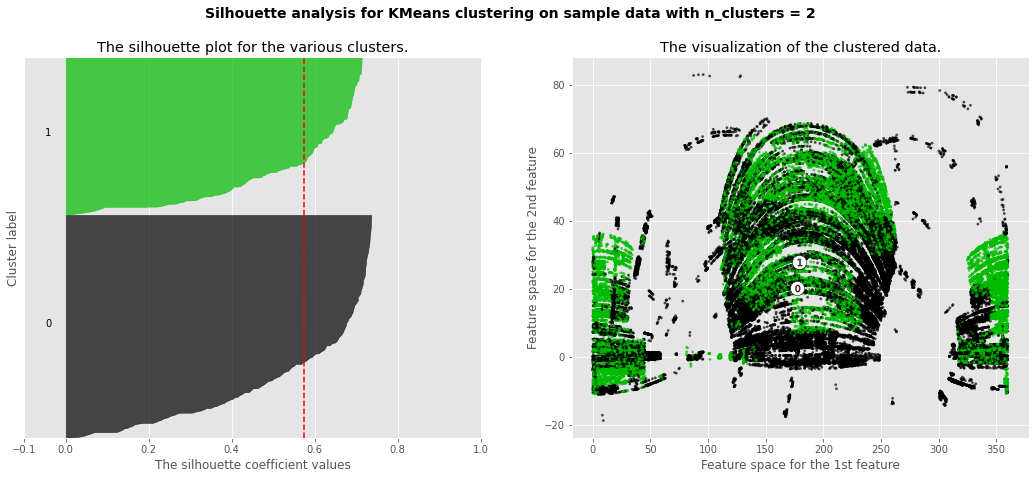

For n_clusters = 3 The silhouette_score is : 0.6119220136140294


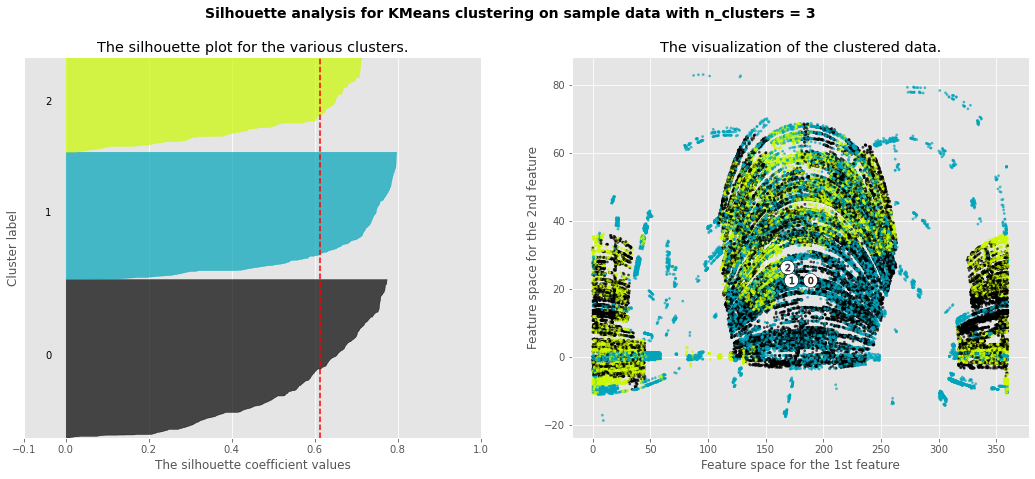

For n_clusters = 4 The silhouette_score is : 0.593575621783908


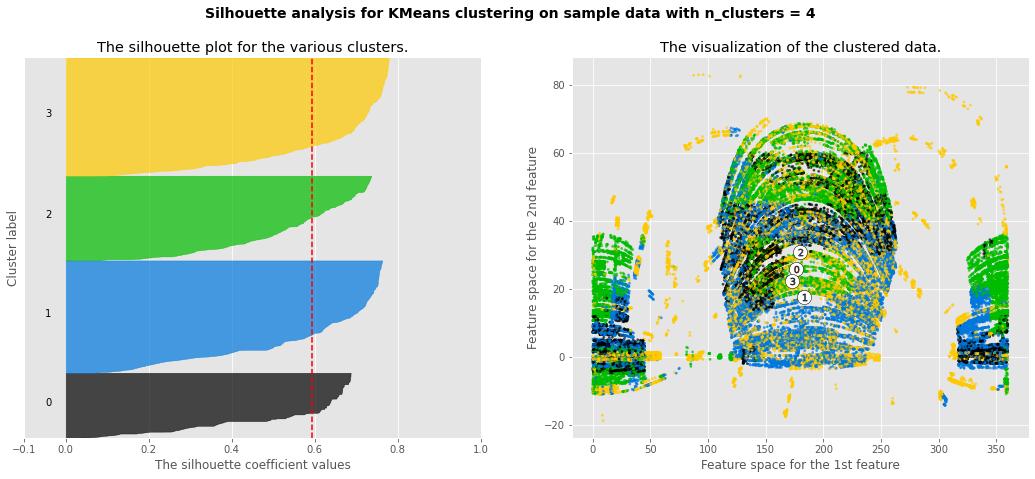

For n_clusters = 5 The silhouette_score is : 0.5857406457568644


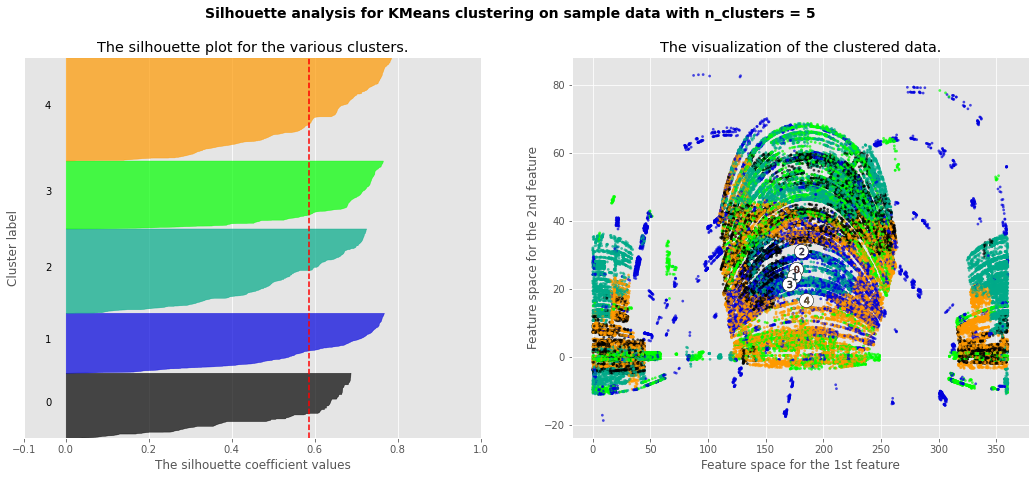

For n_clusters = 6 The silhouette_score is : 0.5890318221073857


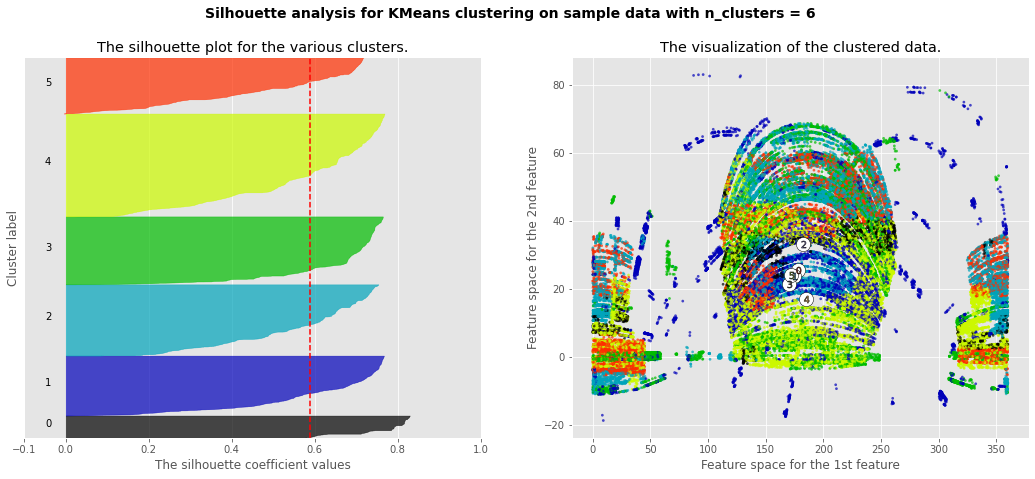

For n_clusters = 7 The silhouette_score is : 0.5791386409248354


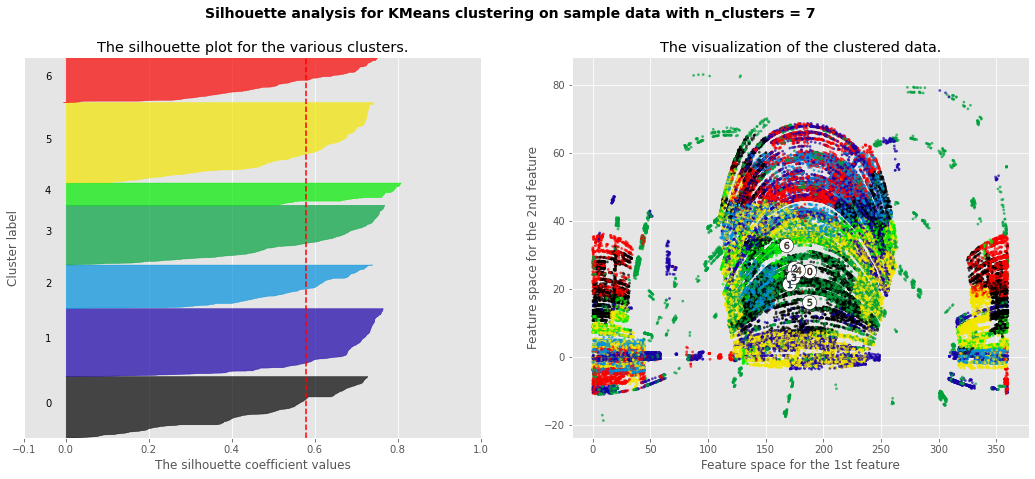

In [202]:
d = df.drop('class_num', axis=1).values
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette coefficient of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(d[:, 3], d[:, 4], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 3], centers[:, 4], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[3], c[4], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# `ra` x `dec` visualization also indicates we are look at mostly the northern--relative to the celestial sphere--sky?

In [211]:
df.columns

Index(['plate', 'z', 'redshift', 'alpha', 'delta', 'u', 'g', 'r', 'i',
       'class_num'],
      dtype='object')

In [208]:
import seaborn as sns

# Ground Truth ('GALAXY', 'STAR', 'QSO')

In [219]:
xx = df
xx['class'] = le.classes_[xx['class_num']]
xx.head(2)

plate         z  redshift       alpha      delta         u         g  \
0   5812  18.79371  0.634794  135.689107  32.494632  23.87882  22.27530   
1  10445  21.61427  0.779136  144.826101  31.274185  24.77759  22.83188   

          r         i  class_num   class  
0  20.39501  19.16573          0  GALAXY  
1  22.58444  21.16812          0  GALAXY

# Position view (x=`ra`, y=`dec`)

<AxesSubplot:xlabel='alpha', ylabel='delta'>

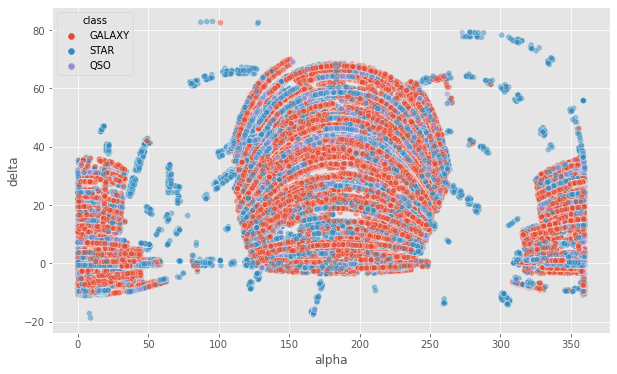

In [221]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.5, data=xx)

<AxesSubplot:xlabel='alpha', ylabel='delta'>

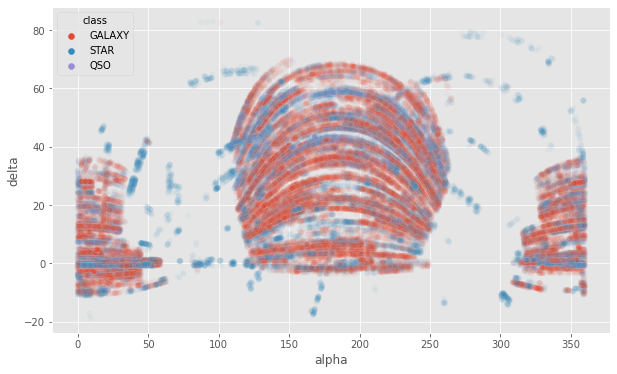

In [222]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.05, data=xx)

<AxesSubplot:xlabel='alpha', ylabel='delta'>

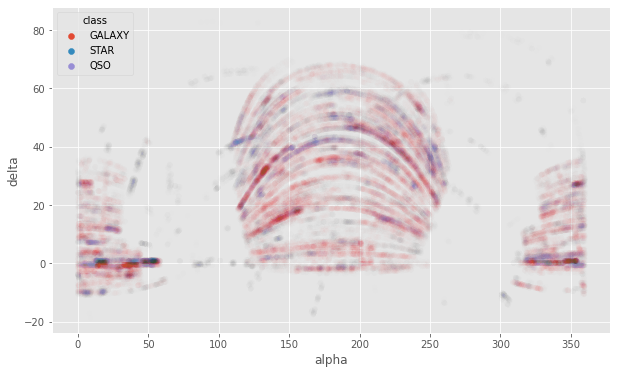

In [223]:
sns.scatterplot(x='alpha', y='delta', hue='class', alpha=.005, data=xx)

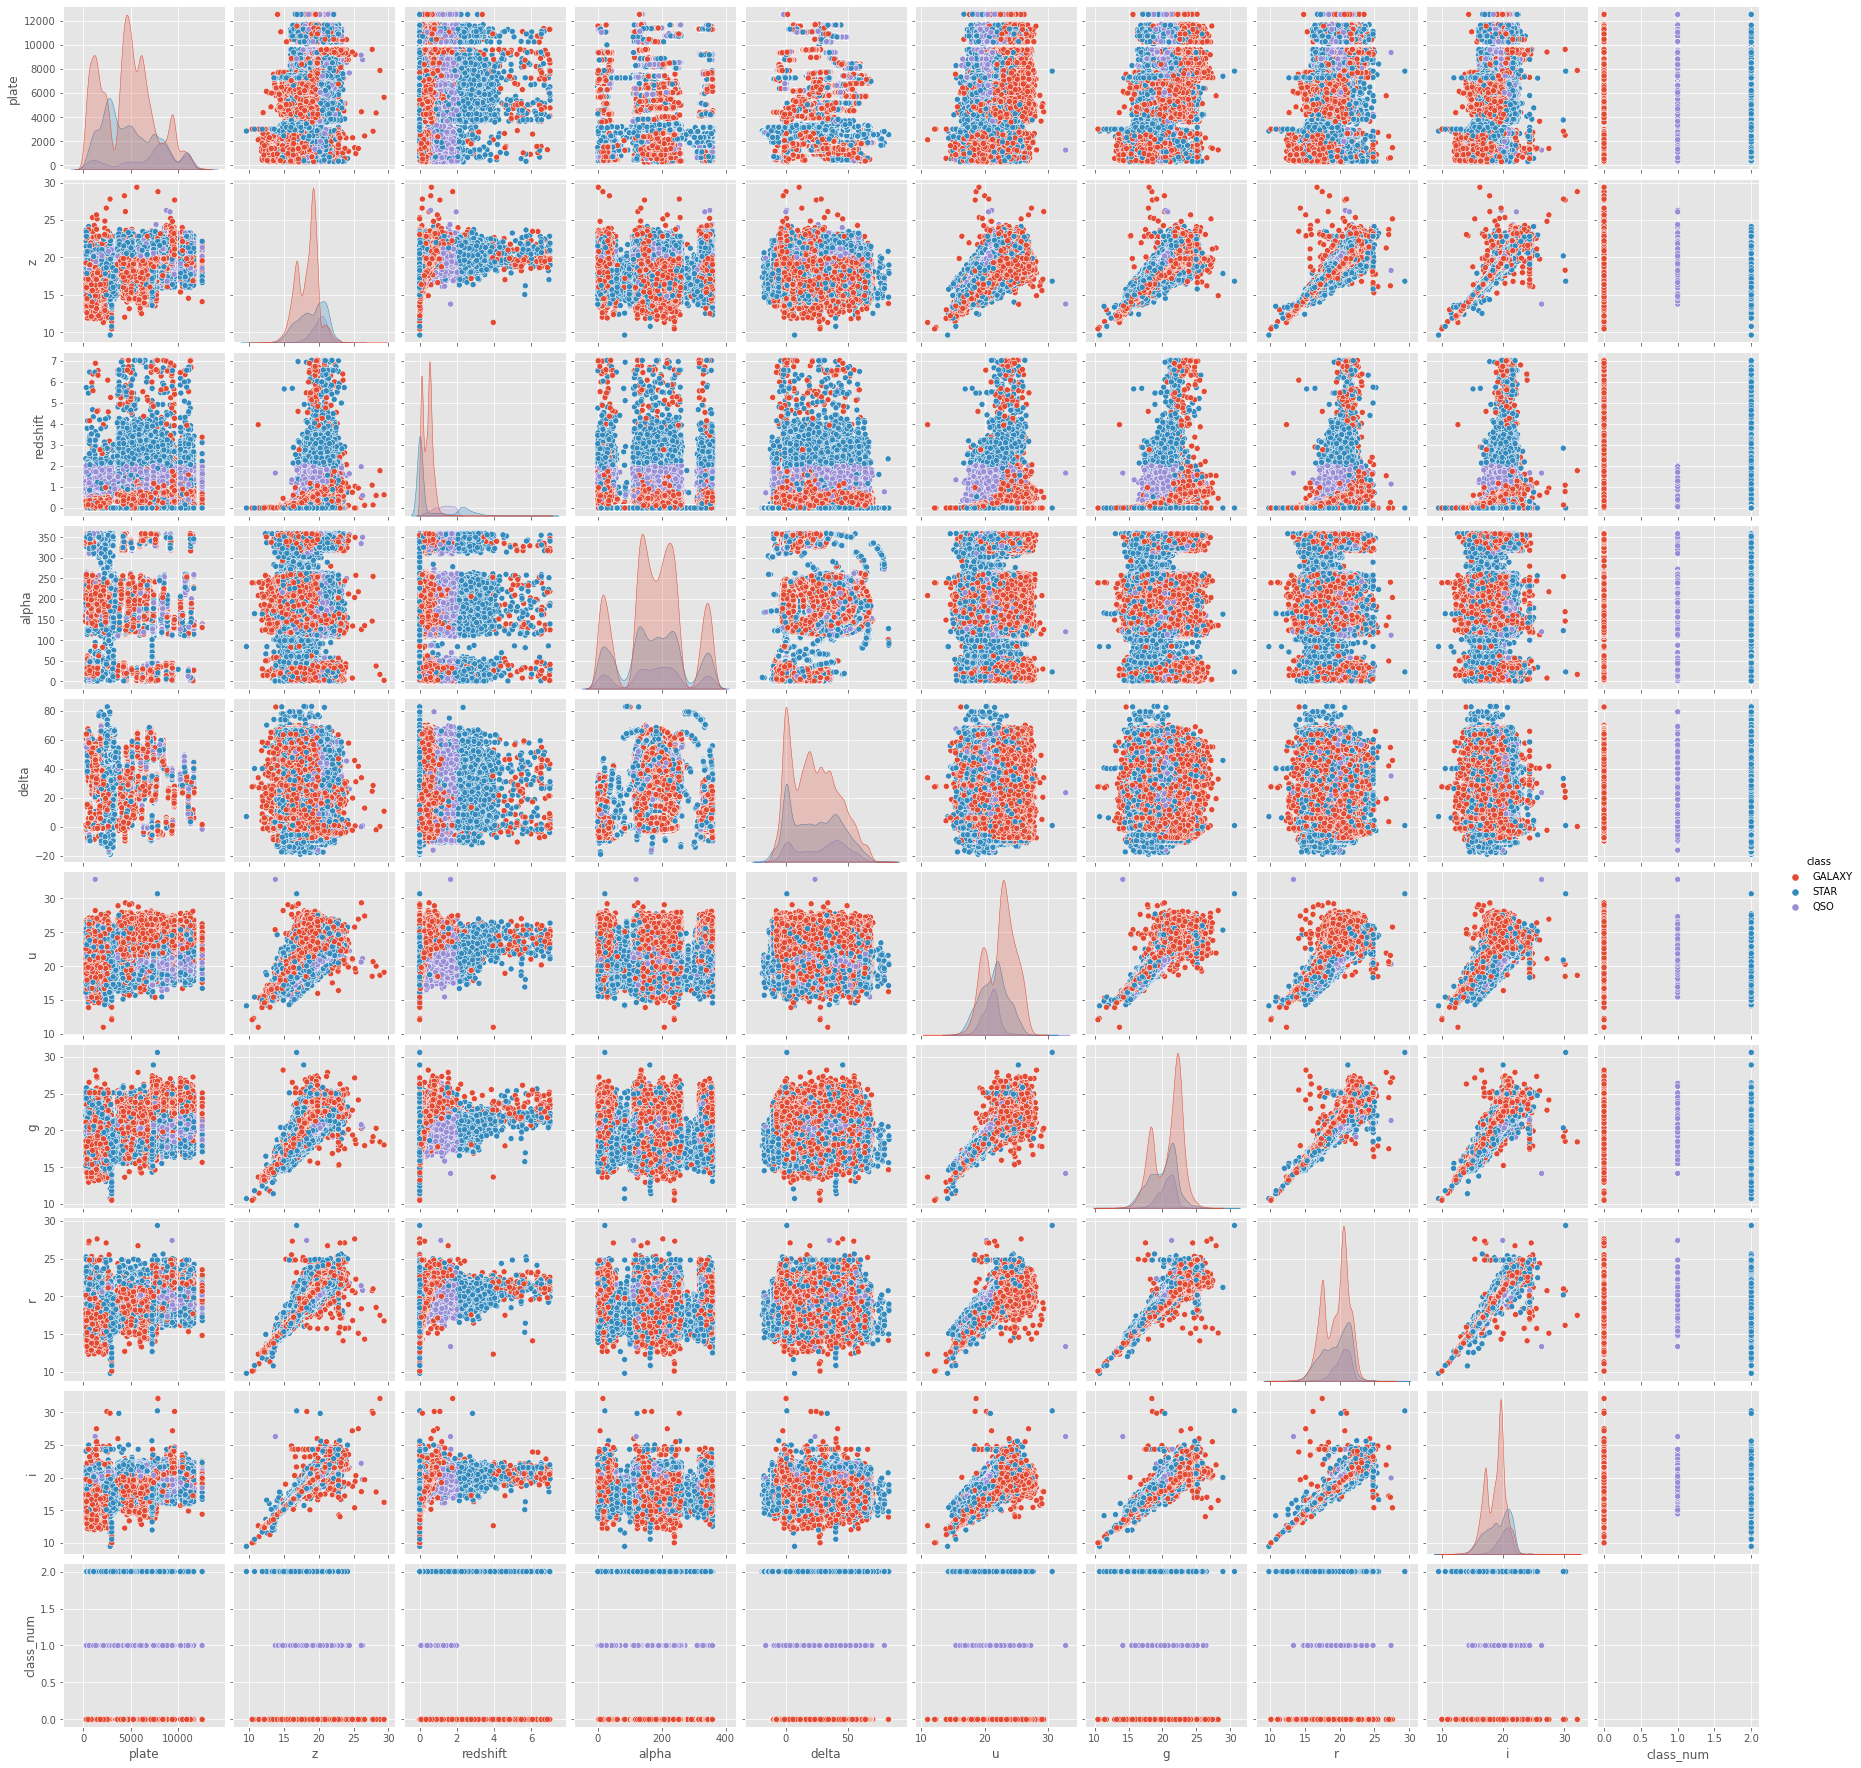

In [224]:
sns.pairplot(xx, hue='class')

<AxesSubplot:xlabel='i', ylabel='r'>

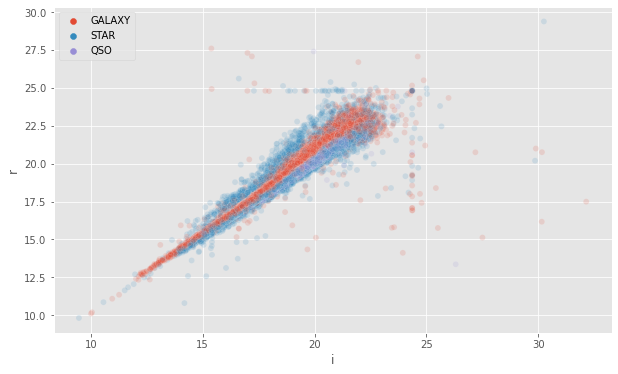

In [225]:
sns.scatterplot(x='i', y='r', data=xx, hue=df['class'].values, alpha=.15)

<AxesSubplot:xlabel='i', ylabel='r'>

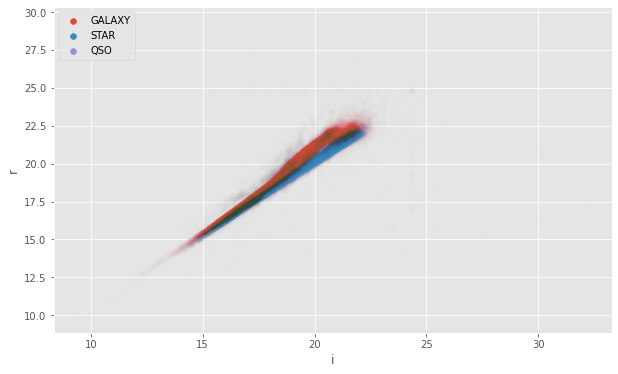

In [249]:
sns.scatterplot(x='i', y='r', data=xx, hue=df['class'].values, alpha=.002)

<AxesSubplot:xlabel='redshift', ylabel='z'>

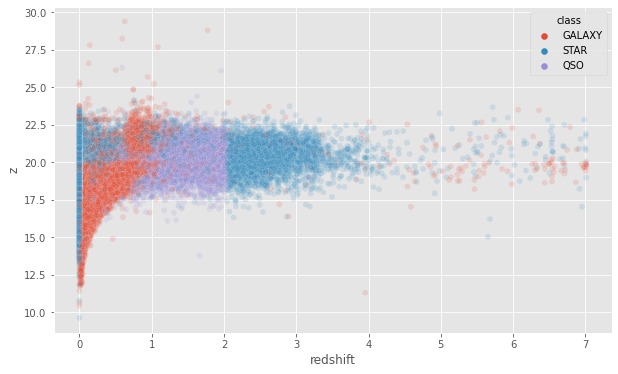

In [227]:
sns.scatterplot(x='redshift', y='z', data=xx, hue=xx['class'], alpha=.15)

<AxesSubplot:xlabel='redshift', ylabel='z'>

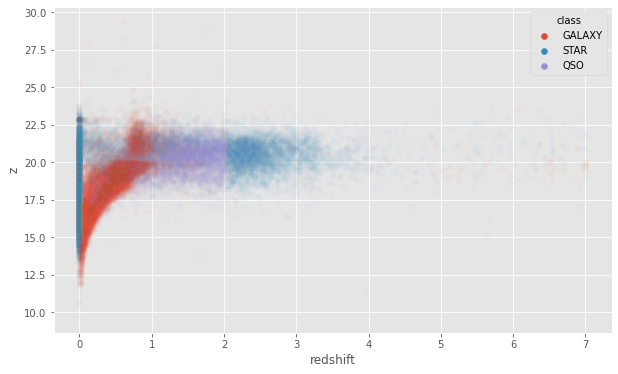

In [230]:
sns.scatterplot(x='redshift', y='z', data=xx, hue=xx['class'], alpha=.025)

<AxesSubplot:xlabel='g', ylabel='z'>

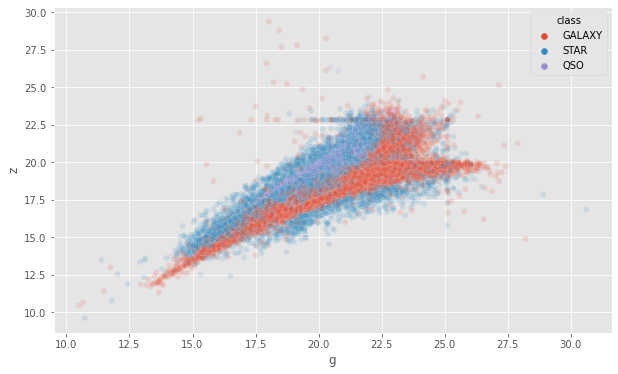

In [231]:
sns.scatterplot(x='g', y='z', data=xx, hue=df['class'], alpha=.15)

<AxesSubplot:xlabel='g', ylabel='z'>

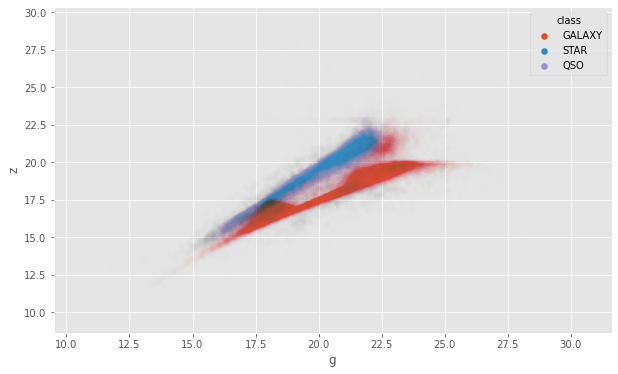

In [241]:
sns.scatterplot(x='g', y='z', data=xx, hue=df['class'], alpha=.002)

# Interesting ring of QSO around the STAR cluster

In [256]:
df['class'].value_counts()

GALAXY    42903
STAR      21059
QSO        7193
Name: class, dtype: int64